## Read data, split data into train and test, extract features and target

In [1]:
import pandas as pd
import numpy as np
import os
import time

from importlib import reload
import deep_neural_network as dnn

#%run deep_neural_network.ipynb # Importing my implementation of DNN
#%load_ext autoreload
#%autoreload 2
#%reload_ext autoreload

In [2]:
mnist = pd.read_csv(os.path.join("C:\Study\DataSets\MNIST_Handwritten_Digit_Recognizer", "train.csv"))
print("Dataset size =", mnist.shape)

# Prepare features(X) and target(y)
X = mnist.drop("label", axis=1)
y = mnist["label"]

Dataset size = (42000, 785)


In [3]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mnist, test_size=0.2, random_state=42)
print("Length of train_set =", train_set.shape[0], "AND test_set =", test_set.shape[0])

# Now shuffle the train dataset
split_idx = len(train_set)
shuffle_index = np.random.permutation(split_idx)
train_set = train_set.iloc[shuffle_index]
print("Length of shuffled train_set =", train_set.shape[0])

Length of train_set = 33600 AND test_set = 8400
Length of shuffled train_set = 33600


In [4]:
# Extract features(X) and target(y) from train and test set
X_train = train_set.drop("label", axis=1)
y_train = train_set["label"]

X_test = test_set.drop("label", axis=1)
y_test = test_set["label"]

In [5]:
# Transpose the shape of datasets
X_train = X_train.values.T
y_train = y_train.values.reshape(1, -1)

X_test = X_test.values.T
y_test = y_test.values.reshape(1, -1)

print("Shape of train_set =", X_train.shape, y_train.shape, "AND test_set =", X_test.shape, y_test.shape)

Shape of train_set = (784, 33600) (1, 33600) AND test_set = (784, 8400) (1, 8400)


In [6]:
# Standardize data to have feature values between 0 and 1.
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
# In order to treat this as a binary classification problem,
# training the model only for digit 5
y_train_5 = (y_train == 5) #True for all 5s, False for all other digits
y_test_5 = (y_test == 5)
y_train_5.shape

(1, 33600)

## Build DNN model

In [18]:
# Define number of nodes in each layer
# of the L-layer model
layers_dims = [X_train.shape[0], 50, 30, 20, 10, 1]
layers_dims

[784, 50, 30, 20, 10, 1]

Cost after iteration 0: 0.726411
Cost after iteration 100: 0.065372
Cost after iteration 200: 0.040708
Cost after iteration 300: 0.019757
Cost after iteration 400: 0.013633
Cost after iteration 500: 0.012837
Cost after iteration 600: 0.006968
Cost after iteration 700: 0.004694
Cost after iteration 800: 0.003294
Cost after iteration 900: 0.002408


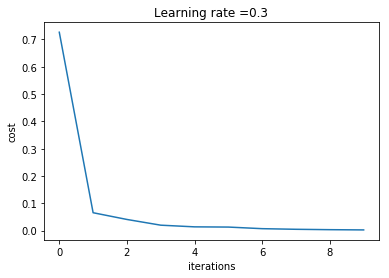

In [19]:
reload(dnn)

parameters = dnn.train_neural_network(X_train, y_train_5, layers_dims, learning_rate = 0.3, 
                                      num_iterations = 1000, print_cost = True)

In [20]:
# Predict of train data
prob_train, pred_train = dnn.predict_output(X_train, y_train_5, parameters)

Accuracy: 90.79464285714286 %


In [21]:
# Predict of test data
prob_train, pred_train = dnn.predict_output(X_test, y_test_5, parameters)

Accuracy: 91.64285714285715 %
